<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.
Use the version as per your python version.


In [1]:
!pip install yfinance
!pip install bs4
!pip install nbformat

In [2]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [3]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [4]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021-06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [5]:
import yfinance as yf
tesla_ticker = yf.Ticker("TSLA")
tesla_ticker

yfinance.Ticker object <TSLA>

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [6]:
tesla_data = tesla_ticker.history(period="max")
tesla_data

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0
...,...,...,...,...,...,...,...
2025-02-03 00:00:00-05:00,386.679993,389.170013,374.359985,383.679993,93732100,0.0,0.0
2025-02-04 00:00:00-05:00,382.630005,394.000000,381.399994,392.209991,57072200,0.0,0.0
2025-02-05 00:00:00-05:00,387.510010,388.390015,375.529999,378.170013,57223300,0.0,0.0


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [7]:
tesla_data.reset_index(inplace=True)

## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [8]:
html=" https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"


In [9]:
data = requests.get(html)
data

<Response [200]>

Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [10]:
soup = BeautifulSoup(data.text, 'html.parser')
soup



<!DOCTYPE html>

<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js"> <!--<![endif]-->
<head>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
<title>Tesla Revenue 2010-2022 | TSLA | MacroTrends</title>
<meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;Tesla revenue for the quarter ending September 30,

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [14]:
table = soup.find('table', class_='historical_data_table table')
# Extract data into list of dictionaries
rows = table.find_all('tr')
data = []
for row in rows:
    cols = row.find_all('td')
    if len(cols) > 1: 
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
    data.append({'Date': date, 'Revenue': revenue})
    
tesla_revenue = pd.DataFrame(data)
tesla_revenue

,Date,Revenue
0,2009,$112
1,2021,"$53,823"
2,2020,"$31,536"
3,2019,"$24,578"
4,2018,"$21,461"
5,2017,"$11,759"
6,2016,"$7,000"
7,2015,"$4,046"
8,2014,"$3,198"
9,2013,"$2,013"


Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [15]:
tesla_revenue["Revenue"] = tesla_revenue['Revenue'].str.replace(',|\$',"")

Execute the following lines to remove an null or empty strings in the Revenue column.


In [16]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [17]:
print(tesla_revenue.tail())


    Date Revenue
9   2013  $2,013
10  2012    $413
11  2011    $204
12  2010    $117
13  2009    $112


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [18]:
import yfinance as yf

# Create a ticker object for GameStop using its ticker symbol
gme_ticker = yf.Ticker("GME")
gme_ticker



yfinance.Ticker object <GME>

Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [19]:
gme_data = gme_ticker.history(period="max")

**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [20]:
gme_data.reset_index(inplace=True)

## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [21]:
import requests

# URL of the webpage to be downloaded
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the text of the response
    html_data_2 = response.text
    print("Webpage downloaded successfully.")
else:
    print("Failed to download the webpage. Status code:", response.status_code)


Webpage downloaded successfully.


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [22]:
from bs4 import BeautifulSoup

# Assuming html_data_2 contains the HTML source as a string
soup_html_parser = BeautifulSoup(html_data_2, 'html.parser')  # Using the built-in html.parser
       # Using html5lib
soup_html_parser
# Example: Print the title of the webpage using both parsers to compare



<!DOCTYPE html>

<!-- saved from url=(0105)https://web.archive.org/web/20200814131437/https://www.macrotrends.net/stocks/charts/GME/gamestop/revenue -->
<html class="js flexbox canvas canvastext webgl no-touch geolocation postmessage websqldatabase indexeddb hashchange history draganddrop websockets rgba hsla multiplebgs backgroundsize borderimage borderradius boxshadow textshadow opacity cssanimations csscolumns cssgradients cssreflections csstransforms csstransforms3d csstransitions fontface generatedcontent video audio localstorage sessionstorage webworkers no-applicationcache svg inlinesvg smil svgclippaths" style=""><!--<![endif]--><head><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/analytics.js.download" type="text/javascript"></script><script async="" src="./GameStop Revenue 2006-2020 _ GME _ MacroTrends_files/gpt.js.download" type="text/javascript"></script><script async="" src=".

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [28]:
from bs4 import BeautifulSoup
import pandas as pd

# Assuming html_data_2 is the HTML content
soup = BeautifulSoup(html_data_2, 'html.parser')

# Find the table specifically by its class
table = soup.find('table', class_='historical_data_table table')

# Initialize a list to hold the data
data1 = []

# Extract rows from the table, assuming the first row is the header
rows = table.find_all('tr')

for row in rows[1:]:  # Skip the header row with [1:]
    cols = row.find_all('td')
    if len(cols) >= 2:  # Ensure there are at least two columns (for Date and Revenue)
        date = cols[0].text.strip()
        revenue = cols[1].text.strip()
        # Remove $ and commas from revenue, handle conversion to float later
        revenue = revenue.replace('$', '').replace(',', '')

        # Append the dictionary to the data1 list
        data1.append({'Date': date, 'Revenue': revenue})

# Create DataFrame from the list of dictionaries
gme_revenue = pd.DataFrame(data1)

# Convert Revenue to float for accurate financial analysis
gme_revenue['Revenue'] = gme_revenue['Revenue'].astype(float)

# Print the DataFrame to check the output
print(gme_revenue.head())


   Date  Revenue
0  2020   6466.0
1  2019   8285.0
2  2018   8547.0
3  2017   7965.0
4  2016   9364.0


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [29]:
# Display the last five rows of the gme_revenue DataFrame
print(gme_revenue.tail())


    Date  Revenue
11  2009   8806.0
12  2008   7094.0
13  2007   5319.0
14  2006   3092.0
15  2005   1843.0


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


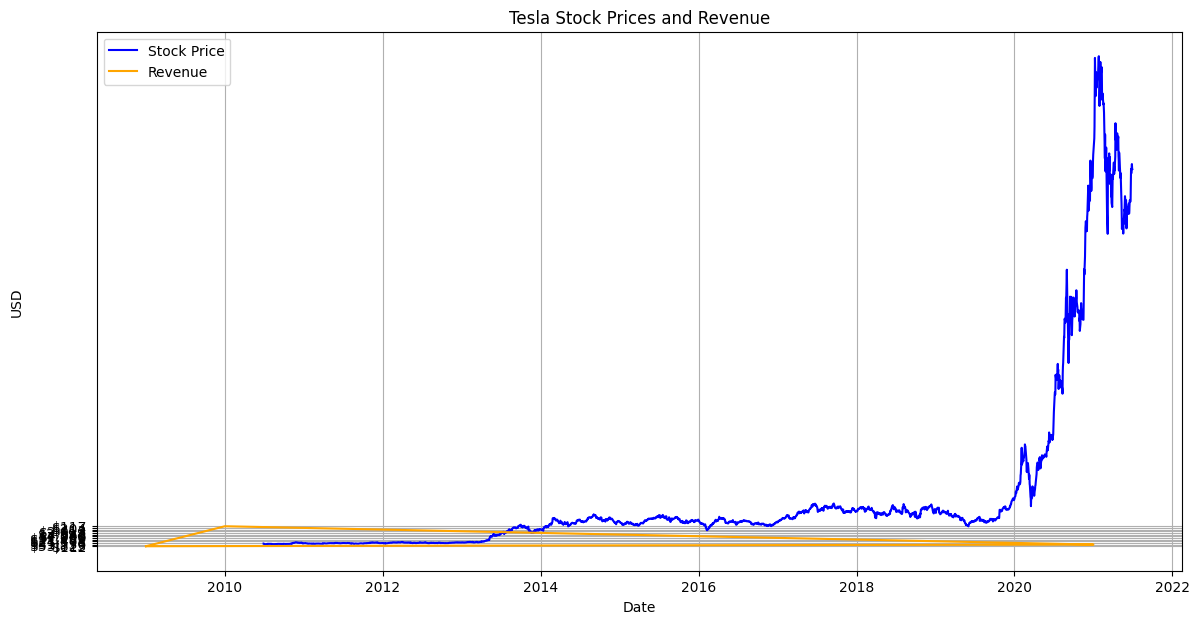

In [30]:

import pandas as pd
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='blue')
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='orange')
    plt.title(f'{title} Stock Prices and Revenue')
    plt.xlabel('Date')
    plt.ylabel('USD')
    plt.legend()
    plt.grid(True)
    plt.show()
tesla_revenue['Date'] = pd.to_datetime(tesla_revenue['Date'])

# Filter data to only include entries up to June 30, 2021
tesla_data_filtered = tesla_data[tesla_data['Date'] <= '2021-06-30']
tesla_revenue_filtered = tesla_revenue[tesla_revenue['Date'] <= '2021-06-30']

# Call the make_graph function
make_graph(tesla_data_filtered, tesla_revenue_filtered, 'Tesla')

## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


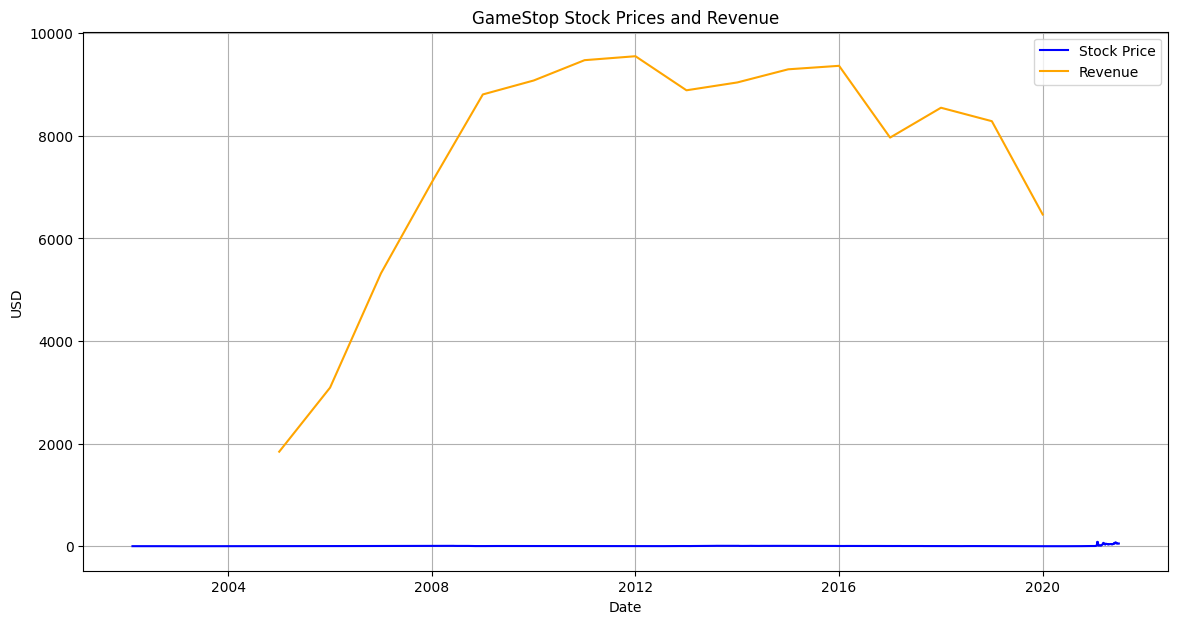

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Define the make_graph function
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(14, 7))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Stock Price', color='blue')
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='orange')
    plt.title(f'{title} Stock Prices and Revenue')
    plt.xlabel('Date')
    plt.ylabel('USD')
    plt.legend()
    plt.grid(True)
    plt.show()


gme_revenue['Date'] = pd.to_datetime(gme_revenue['Date'])

# Filter data to only include entries up to June 30, 2021
gme_data_filtered = gme_data[gme_data['Date'] <= '2021-06-30']
gme_revenue_filtered = gme_revenue[gme_revenue['Date'] <= '2021-06-30']

# Call the make_graph function
make_graph(gme_data_filtered, gme_revenue_filtered, 'GameStop')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
